Anda telah menerima sebuah tugas analitik dari suatu toko daring internasional. Pendahulu Anda gagal untuk menyelesaikan tugas ini: dia sempat menjalankan A/B testing sebelum akhirnya berhenti dari pekerjaannya (katanya sih, demi beternak ayam di kampung). Dia pun hanya meninggalkan spesifikasi teknis dan hasil dari eksperimen yang dilakukannya.

## Mengunduh data dan menyiapkannya untuk analisis 

Untuk mengakses dataset pada platform

### Memuat Library

In [1]:
# Muat semua library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

## Load The Dataset

In [2]:
# load the dataset

# Memuat dataset kalender event pemasaran untuk tahun 2020
#data_hypo = pd.read_csv('/datasets/hypotheses_us.csv')
#data_marketing = pd.read_csv('/datasets/ab_project_marketing_events_us.csv', sep=',')
data_marketing = pd.read_csv('ab_project_marketing_events_us.csv', sep=',')

# Memuat dataset semua pengguna yang mendaftar di toko daring dari tanggal 7 sampai 21 Desember 2020
#data_users = pd.read_csv('/datasets/final_ab_new_users_upd_us.csv', sep=',')
data_users = pd.read_csv('final_ab_new_users_upd_us.csv', sep=',')

# Memuat dataset semua peristiwa dari pengguna baru sepanjang periode 7 Desember 2020 sampai 1 Januari 2021
#data_events = pd.read_csv('/datasets/final_ab_events_upd_us.csv', sep=',')
data_events = pd.read_csv('final_ab_events_upd_us.csv', sep=',')

# Memuat dataset berisi daftar peserta eksperimen
#data_participants = pd.read_csv('/datasets/final_ab_participants_upd_us.csv', sep=',')
data_participants = pd.read_csv('final_ab_participants_upd_us.csv', sep=',')



### Analisis Data Eksploratif (Python)

#### Data Cleaning - dataset data_marketing

In [3]:
# Menampilkan informasi di dataset data_marketing
data_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 580.0+ bytes


In [4]:
#Menampilakn 10 row teratas
data_marketing.head()

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


In [5]:
# Mengubah tipe data kolom tanggal start_dt dan finish_dt menjadi datetime
data_marketing['start_dt'] = pd.to_datetime(data_marketing['start_dt'])
data_marketing['finish_dt'] = pd.to_datetime(data_marketing['finish_dt'])


In [6]:
#Mengecek data ganda
duplicate_marketing = data_marketing[data_marketing.duplicated()]

# Menampilkan nilai duplikat
duplicate_marketing

,name,regions,start_dt,finish_dt


In [7]:
#Mengecek data hilang
data_marketing.isnull().sum()


name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64

In [8]:
data_marketing.head()

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


In [9]:
data_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 580.0+ bytes


#### Data Cleaning - dataset data_users

In [10]:
# Menampilkan informasi di dataset data_users
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [11]:
# Mengubah tipe data kolom tanggal first_date menjadi datetime
data_users['first_date'] = pd.to_datetime(data_users['first_date'])


In [12]:
#Menampilakn 10 row teratas
data_users.head()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [13]:
#Mengecek data ganda
duplicate_users = data_users[data_users.duplicated()]

# Menampilkan nilai duplikat
duplicate_users

,user_id,first_date,region,device


In [14]:
#Mengecek data hilang
data_users.isnull().sum()


user_id       0
first_date    0
region        0
device        0
dtype: int64

In [15]:
from datetime import datetime

# Konversi string tanggal ke format datetime
cutoff_date = datetime(2020, 12, 21)

# Filter data_users berdasarkan first_date
data_users = data_users[data_users['first_date'] < cutoff_date]

# Tampilkan hasil filter
print(data_users)


                user_id first_date     region   device
0      D72A72121175D8BE 2020-12-07         EU       PC
1      F1C668619DFE6E65 2020-12-07  N.America  Android
2      2E1BF1D4C37EA01F 2020-12-07         EU       PC
3      50734A22C0C63768 2020-12-07         EU   iPhone
4      E1BDDCE0DAFA2679 2020-12-07  N.America   iPhone
...                 ...        ...        ...      ...
58698  1DB53B933257165D 2020-12-20         EU  Android
58699  538643EB4527ED03 2020-12-20         EU      Mac
58700  7ADEE837D5D8CBBD 2020-12-20         EU       PC
58701  1C7D23927835213F 2020-12-20         EU   iPhone
58702  8F04273BB2860229 2020-12-20         EU  Android

[47363 rows x 4 columns]


#### Data Cleaning - dataset data_events

In [16]:
# Menampilkan informasi di dataset data_events
data_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB


In [17]:
#Menampilakn 10 row teratas
data_events.head()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [18]:
# Mengubah tipe data kolom tanggal dan waktu event_dt menjadi datetime
data_events['event_dt'] = pd.to_datetime(data_events['event_dt'])


In [19]:
#Mengecek data ganda
duplicate_events = data_events[data_events.duplicated()]

# Menampilkan nilai duplikat
duplicate_events

,user_id,event_dt,event_name,details


In [20]:
#Mengecek data hilang
data_events.isnull().sum()


user_id            0
event_dt           0
event_name         0
details       363447
dtype: int64

#### Data Cleaning - dataset data_participants

In [21]:
# Menampilkan informasi di dataset data_participants
data_participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


In [22]:
#Menampilakn 10 row teratas
data_participants.head()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test


In [23]:
#Mengecek data ganda
duplicate_participants = data_participants[data_participants.duplicated()]

# Menampilkan nilai duplikat
duplicate_participants

,user_id,group,ab_test


In [24]:
#Mengecek data hilang
data_participants.isnull().sum()


user_id    0
group      0
ab_test    0
dtype: int64

#### Mengatasi NIlai Hilang di dataset data_event

In [25]:
# Menampilkan data 
data_events['details'].isnull().sum()

363447

In [26]:
#Menampilkan data uni di kolom 'details'
data_events['event_name'].unique()

array(['purchase', 'product_cart', 'product_page', 'login'], dtype=object)

Mari kita cari tau nilai null di kolom 'details' memiliki nilai 'event_name' apa saja


In [27]:
# Menampilkan data di mana kolom 'details' memiliki nilai null dan 'event_name' memiliki nilai != 'purchase'
details_null_purchase = data_events[(data_events['details'].isnull()) & (data_events['event_name']!='purchase')]

# Menampilkan 5 baris pertama dari data yang telah difilter
print(details_null_purchase.head())


                user_id            event_dt    event_name  details
60314  2E1BF1D4C37EA01F 2020-12-07 09:05:47  product_cart      NaN
60315  50734A22C0C63768 2020-12-07 13:24:03  product_cart      NaN
60316  5EB159DA9DC94DBA 2020-12-07 22:54:02  product_cart      NaN
60317  084A22B980BA8169 2020-12-07 15:25:55  product_cart      NaN
60318  0FC21E6F8FAA8DEC 2020-12-07 06:56:27  product_cart      NaN


Kesimpulan :
    
 - Untuk kesimpulan sementara nilai dikolom 'details' memiliki keterkaitan dengan nilai yang ada di kolom 'event_name'. 
 - Nilai null di kolom 'details' dikarenakan di kolom 'event_name' memiliki nilai selain 'purchase'. 
 - Jadi hanya kolom event_name dengan nilai 'purchase' yang memiliki nilai di kolom 'details'. 
 - selain dari 'purchase' nilai detailnya = null
 - kita akan mengisi nilai 0 dikolom 'details'

In [28]:
# Mengisi nilai-nilai yang hilang dalam kolom 'details' dengan 0
#data_events['details'].fillna(0, inplace=True)
#data_events.loc[:, 'details'].fillna(0, inplace=True)
data_events['details'] = data_events['details'].fillna(0)


In [29]:
data_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     423761 non-null  object        
 1   event_dt    423761 non-null  datetime64[ns]
 2   event_name  423761 non-null  object        
 3   details     423761 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 12.9+ MB


In [30]:
data_events.head()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


Kesimpulan : 

    Nilai di kolom 'details' tidak lagi kosong tetapi sudah berubah bernilai '0'. tidak ada lagi data yang memiliki nilai null di dataset data_events.

In [31]:
# Contoh salah satu user_id

In [32]:
# Menampilkan data dengan user_id tertentu
data_events_user = data_events[data_events['user_id'] == '2E1BF1D4C37EA01F']

# Menampilkan data yang telah dipilih
print(data_events_user)


                 user_id            event_dt    event_name  details
60314   2E1BF1D4C37EA01F 2020-12-07 09:05:47  product_cart      0.0
65344   2E1BF1D4C37EA01F 2020-12-10 04:13:53  product_cart      0.0
69291   2E1BF1D4C37EA01F 2020-12-12 17:54:57  product_cart      0.0
120436  2E1BF1D4C37EA01F 2020-12-07 09:05:46  product_page      0.0
130799  2E1BF1D4C37EA01F 2020-12-10 04:13:53  product_page      0.0
138778  2E1BF1D4C37EA01F 2020-12-12 17:54:57  product_page      0.0
241298  2E1BF1D4C37EA01F 2020-12-07 09:05:46         login      0.0
256883  2E1BF1D4C37EA01F 2020-12-10 04:13:53         login      0.0
268928  2E1BF1D4C37EA01F 2020-12-12 17:54:57         login      0.0


Notes :

    Untuk user_id '2E1BF1D4C37EA01F' tidak memiliki histori hingga ke purchase, namun hanya sampai product chart saja. 

In [33]:
# Menampilkan data dengan user_id tertentu
data_events_user = data_events[data_events['user_id'] == '0010A1C096941592']

# Menampilkan data yang telah dipilih
print(data_events_user)


                 user_id            event_dt    event_name  details
27169   0010A1C096941592 2020-12-17 21:07:27      purchase     4.99
32301   0010A1C096941592 2020-12-19 04:34:37      purchase     4.99
41197   0010A1C096941592 2020-12-21 21:05:23      purchase     4.99
49838   0010A1C096941592 2020-12-23 11:52:09      purchase     9.99
174870  0010A1C096941592 2020-12-17 21:07:27  product_page     0.00
185301  0010A1C096941592 2020-12-19 04:34:38  product_page     0.00
202967  0010A1C096941592 2020-12-21 21:05:24  product_page     0.00
220156  0010A1C096941592 2020-12-23 11:52:10  product_page     0.00
323395  0010A1C096941592 2020-12-17 21:07:27         login     0.00
339150  0010A1C096941592 2020-12-19 04:34:37         login     0.00
365882  0010A1C096941592 2020-12-21 21:05:23         login     0.00
391795  0010A1C096941592 2020-12-23 11:52:09         login     0.00


Notes :

Untuk user_id '0010A1C096941592' tidak memiliki histori 'product_cart' namun user_id ini sampai pada ke purchase, jadi ada 1 tahap yang dilewatkan. jadi konsumen ini , login, lihat product page lalu tertarik dan langsung memutuskan membeli, tanpa memasukkan productnya dulu ke dalam keranjang. 

Jika banyak konsumen yang cenderung memiliki perilaku seperti ini maka mungkin corong / funnel jumlah purchase lebih banyak dari product_page . 

In [34]:
# Grupkan data berdasarkan user_id dan event_dt, lalu hitung jumlah event_name yang berbeda
data_events_unique_events = data_events.groupby(['user_id', 'event_dt'])['event_name'].nunique().reset_index()

# Filter data hanya untuk kasus di mana jumlah event_name yang berbeda lebih dari 1
data_multiple_event_names = data_events_unique_events[data_events_unique_events['event_name'] > 1]

# Tampilkan data
print(data_multiple_event_names.head())


             user_id            event_dt  event_name
6   000199F1887AE5E6 2020-12-14 09:56:09           3
8   000199F1887AE5E6 2020-12-15 07:22:56           4
9   000199F1887AE5E6 2020-12-20 06:36:35           3
11  000199F1887AE5E6 2020-12-21 02:11:23           2
12  000199F1887AE5E6 2020-12-21 02:11:24           2


## analisis data eksplorati

#### analisis konversi di berbagai tahapan corong

Mengidentifikasi Tahapan Corong:

In [35]:
# Mengidentifikasi tahap-tahap corong yang relevan
tahap_corong = data_events['event_name'].unique()

# Menampilkan nilai-nilai unik yang terkait dengan tahap-tahap corong
print(tahap_corong)


['purchase' 'product_cart' 'product_page' 'login']


Hitung Jumlah Pengguna di Setiap Tahap:

In [36]:
# Menghitung jumlah unik pengguna yang melakukan setiap tahap corong
jumlah_pengguna_per_tahap = data_events.groupby('event_name')['user_id'].nunique()

# Menampilkan hasil perhitungan
print(jumlah_pengguna_per_tahap)


event_name
login           58696
product_cart    19284
product_page    38929
purchase        19568
Name: user_id, dtype: int64


Hitung Konversi:

In [37]:
# Hitung konversi dari login ke product_page
konversi_login_to_page = (jumlah_pengguna_per_tahap['product_page'] / jumlah_pengguna_per_tahap['login']) * 100

# Hitung konversi dari product_page ke product_cart
konversi_page_to_cart = (jumlah_pengguna_per_tahap['product_cart'] / jumlah_pengguna_per_tahap['product_page']) * 100

# Hitung konversi dari product_cart ke purchase
konversi_cart_to_purchase = (jumlah_pengguna_per_tahap['purchase'] / jumlah_pengguna_per_tahap['product_cart']) * 100

# Menampilkan hasil perhitungan
print(f"Konversi dari Login ke Product Page: {konversi_login_to_page:.2f}%")
print(f"Konversi dari Product Page ke Product Cart: {konversi_page_to_cart:.2f}%")
print(f"Konversi dari Product Cart ke Purchase: {konversi_cart_to_purchase:.2f}%")


Konversi dari Login ke Product Page: 66.32%
Konversi dari Product Page ke Product Cart: 49.54%
Konversi dari Product Cart ke Purchase: 101.47%


Visualisasikan Konversi:

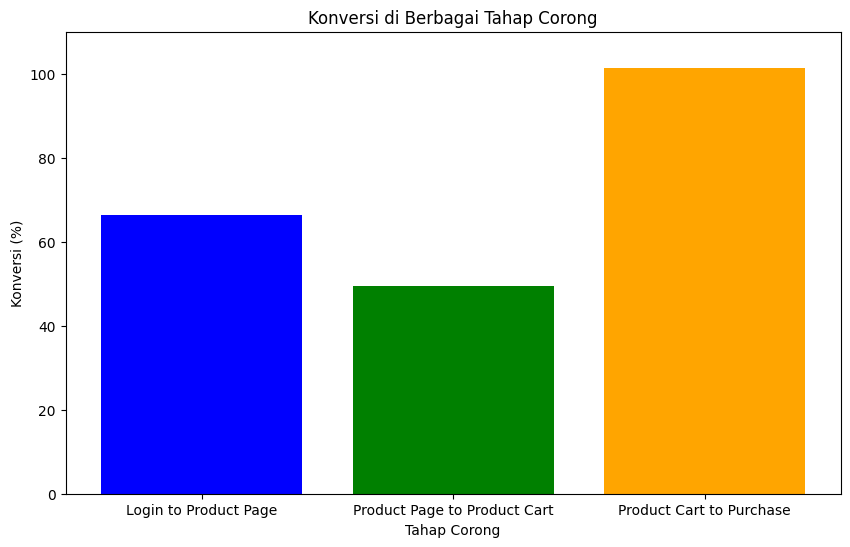

In [38]:
import matplotlib.pyplot as plt

# Tahapan corong
tahap_corong = ['Login to Product Page', 'Product Page to Product Cart', 'Product Cart to Purchase']

# Persentase konversi
konversi = [konversi_login_to_page, konversi_page_to_cart, konversi_cart_to_purchase]

# Membuat grafik batang
plt.figure(figsize=(10, 6))
plt.bar(tahap_corong, konversi, color=['blue', 'green', 'orange'])
plt.xlabel('Tahap Corong')
plt.ylabel('Konversi (%)')
plt.title('Konversi di Berbagai Tahap Corong')
plt.ylim(0, 110)  # Mengatur batas y-axis agar tidak melebihi 100%
plt.show()


Analisis Hasil:

**Konversi dari Login ke Product Page (66.32%):**

Konversi dari tahap login ke product_page terlihat kuat, dengan sekitar 66.32% pengguna yang berhasil mencapai product_page setelah login.
Ini menunjukkan bahwa sebagian besar pengguna yang login melanjutkan untuk melihat halaman produk.

**Konversi dari Product Page ke Product Cart (49.54%):**

Konversi dari tahap product_page ke product_cart adalah sekitar 49.54%.
Ada penurunan konversi yang signifikan dari product_page ke product_cart, yang mungkin perlu dianalisis lebih lanjut untuk memahami penyebabnya. Ini bisa menjadi area potensial untuk perbaikan. 

Namun bisa jadi penurunan ini terjadi akibat banyak konsumen yang men-skip memasukkan barang kedalam keranjang, dan langsung membelinya, bisa jadi ini akibat konsumen sudah yakin akan membeli product.

**Konversi dari Product Cart ke Purchase (101.47%):**

Konversi dari tahap product_cart ke purchase mencapai lebih dari 100%, yaitu sekitar 101.47%.
Hasil ini mungkin perlu diperiksa lebih lanjut karena konversi yang melebihi 100% mungkin terkait dengan beberapa pengguna yang melakukan lebih dari satu pembelian.

#### Analisis jumlah peristiwa per pengguna terdistribusi secara merata di seluruh sampel

In [39]:
# Hitung Jumlah Peristiwa per Pengguna:
peristiwa_per_pengguna = data_events.groupby('user_id')['event_name'].count()
peristiwa_per_pengguna.head()

user_id
0001710F4DDB1D1B     6
000199F1887AE5E6    16
0002499E372175C7     9
0002CE61FF2C4011    12
000456437D0EFFE1     4
Name: event_name, dtype: int64

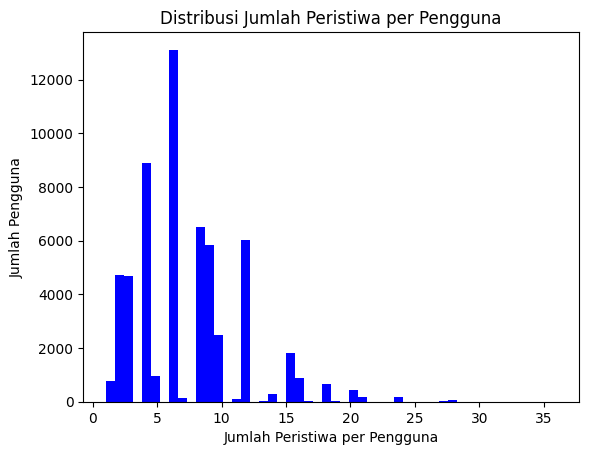

In [40]:
import matplotlib.pyplot as plt

plt.hist(peristiwa_per_pengguna, bins=50, color='blue')
plt.xlabel('Jumlah Peristiwa per Pengguna')
plt.ylabel('Jumlah Pengguna')
plt.title('Distribusi Jumlah Peristiwa per Pengguna')
plt.show()


In [41]:
print("Rata-rata Jumlah Peristiwa per Pengguna:", peristiwa_per_pengguna.mean())
print("Median Jumlah Peristiwa per Pengguna:", peristiwa_per_pengguna.median())
print("Deviasi Standar Jumlah Peristiwa per Pengguna:", peristiwa_per_pengguna.std())


Rata-rata Jumlah Peristiwa per Pengguna: 7.218728174028585
Median Jumlah Peristiwa per Pengguna: 6.0
Deviasi Standar Jumlah Peristiwa per Pengguna: 4.122608828267511


In [42]:
#Hitung Quartile Pertama (Q1) dan Quartile Ketiga (Q3):
Q1 = peristiwa_per_pengguna.quantile(0.25)
Q3 = peristiwa_per_pengguna.quantile(0.75)

#Hitung IQR (Interquartile Range):
IQR = Q3 - Q1

print("Nilai Q1 :", Q1)
print("Nilai Q3 :", Q3)
print("Nilai IQR :", IQR)

Nilai Q1 : 4.0
Nilai Q3 : 9.0
Nilai IQR : 5.0


In [43]:
#Hitung Batas Atas (Upper Bound) dan Batas Bawah (Lower Bound):
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

print("upper_bound :", upper_bound)
print("lower_bound :", lower_bound)

upper_bound : 16.5
lower_bound : -3.5


In [44]:
#Identifikasi Outlier:
outliers = peristiwa_per_pengguna[(peristiwa_per_pengguna < lower_bound) | (peristiwa_per_pengguna > upper_bound)]
outliers.head()

user_id
000921BDA987CB74    17
00607344650B2FB0    21
00671D9BA207FB9E    20
007C037F5985AEE8    18
007DD85374661639    17
Name: event_name, dtype: int64

In [45]:
#Identifikasi no_outlier:
no_outliers = peristiwa_per_pengguna[(peristiwa_per_pengguna >= lower_bound) & (peristiwa_per_pengguna <= upper_bound)]
no_outliers.head()

user_id
0001710F4DDB1D1B     6
000199F1887AE5E6    16
0002499E372175C7     9
0002CE61FF2C4011    12
000456437D0EFFE1     4
Name: event_name, dtype: int64

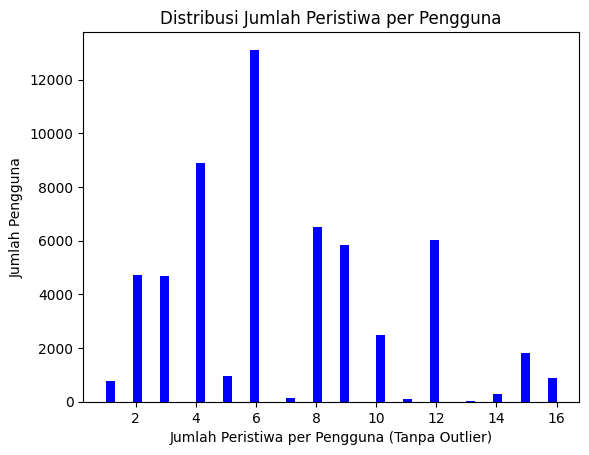

In [46]:
import matplotlib.pyplot as plt

plt.hist(no_outliers, bins=50, color='blue')
plt.xlabel('Jumlah Peristiwa per Pengguna (Tanpa Outlier)')
plt.ylabel('Jumlah Pengguna')
plt.title('Distribusi Jumlah Peristiwa per Pengguna')
plt.show()


In [47]:
# Filter data_events berdasarkan user_id yang masuk dalam no_outliers
data_events = data_events[data_events['user_id'].isin(no_outliers.index)]

# Tampilkan hasil filter
print(data_events)


                 user_id            event_dt event_name  details
0       E1BDDCE0DAFA2679 2020-12-07 20:22:03   purchase    99.99
1       7B6452F081F49504 2020-12-07 09:22:53   purchase     9.99
2       9CD9F34546DF254C 2020-12-07 12:59:29   purchase     4.99
3       96F27A054B191457 2020-12-07 04:02:40   purchase     4.99
4       1FD7660FDF94CA1F 2020-12-07 10:15:09   purchase     4.99
...                  ...                 ...        ...      ...
423755  6181F3835EBE66BF 2020-12-30 12:00:00      login     0.00
423756  245E85F65C358E08 2020-12-30 19:35:55      login     0.00
423757  9385A108F5A0A7A7 2020-12-30 10:54:15      login     0.00
423758  DB650B7559AC6EAC 2020-12-30 10:59:09      login     0.00
423760  7AEC61159B672CC5 2020-12-30 11:36:13      login     0.00

[392372 rows x 4 columns]


#### Analisis pengguna yang berada di kedua sampel

Apakah ada pengguna yang berada di kedua sampel?

In [48]:
#Gabungkan Data Grup A dan Grup B:
data_group_a = data_participants[data_participants['group'] == 'A']
data_group_b = data_participants[data_participants['group'] == 'B']

# Gabungkan data Grup A dan Grup B berdasarkan kolom 'user_id'
combined_data = data_group_a.merge(data_group_b, on='user_id', how='inner')

# Ambil daftar user_id yang berada di kedua grup
pengguna_di_grup_a_dan_b = combined_data['user_id'].unique()

# Tampilkan daftar user_id yang berada di kedua grup
print("Pengguna yang Berada di Kedua Grup (A dan B):")
for user_id in pengguna_di_grup_a_dan_b:
    print(user_id)


Pengguna yang Berada di Kedua Grup (A dan B):
FC3F3E4DA7C85F88
FE2AF0E94DBD470E
C5AD06762E628169
25CE0629AC6B6971
44EB15AD423DC31C
E594B711ADD81DD8
CFDED9167B27A57F
C86F0150DA3B10F2
5D72D0AEF96C50FD
81AA83FBC31B6C0B
697F116B31D05FCF
F97D8746923ABA37
0CC466ED84E0756D
2170CB76798D36EE
3656B8F3DEF02DA0
DC41AFF8213BE01A
AB94ADBD1345E896
FEC0BCA6C323872F
5813B74E3ED6094E
C6C4C814B7B202E7
F85FD73AAF991283
BE3C02D74A664180
A2212CF79158D340
F5B4B562971760C6
A4F18DF9C484EDC0
F68F7886D0BCE784
A4D5B31067614B05
A791C2D62B213C96
49D69A4901413D82
2F52D15FF20EE730
B242B046BC32ADDA
6655D192F953E7CE
D1FA009C9B514DD7
CCE74CB0FBDD3533
C389958204955C98
5424E9D321EC3567
68B3C70F0C0B4550
412F5C9F04EE8F69
A800CDEA85871EEF
02313B9E82255F47
37E78FED858E7061
ABFF0B9BAD11BB5D
83E9CFC64D61108E
F507CB8030C885FB
4803D52DB8782CC2
8F5D7DE5A7B06249
EF6DBFA129654B41
D82DD23742E57665
DE078758B0515023
8CE0BDF8F59A752E
A352755099619F01
8BD80DB1522F7120
65A33D1E2F637CE6
123C3AC236BE84F0
0BC7C730D40D19D3
61D3434CE0D95AB7
13

In [49]:

# Menampilkan jumlah user_id yang ada di kedua grup
print("Jumlah Pengguna yang Berada di Kedua Grup (A dan B):", len(pengguna_di_grup_a_dan_b))
print("Jumlah Pengguna yang Berada di Grup A :", len(data_group_a))
print("Jumlah Pengguna yang Berada di Grup B :",len(data_group_b))

Jumlah Pengguna yang Berada di Kedua Grup (A dan B): 441
Jumlah Pengguna yang Berada di Grup A : 8214
Jumlah Pengguna yang Berada di Grup B : 6311


Jadi ada 441 row di group A dan 441 row di group B

In [50]:
# Filter data_participants untuk user_id yang tidak masuk dalam pengguna_di_grup_a_dan_b
data_participants = data_participants[~data_participants['user_id'].isin(pengguna_di_grup_a_dan_b)]

# Tampilkan hasil filter
print(data_participants)



                user_id group                  ab_test
0      D1ABA3E2887B6A73     A  recommender_system_test
1      A7A3664BD6242119     A  recommender_system_test
2      DABC14FDDFADD29E     A  recommender_system_test
3      04988C5DF189632E     A  recommender_system_test
4      4FF2998A348C484F     A  recommender_system_test
...                 ...   ...                      ...
14520  1D302F8688B91781     B        interface_eu_test
14521  3DE51B726983B657     A        interface_eu_test
14522  F501F79D332BE86C     A        interface_eu_test
14523  63FBE257B05F2245     A        interface_eu_test
14524  79F9ABFB029CF724     B        interface_eu_test

[13643 rows x 3 columns]


Kesimpulan : 

    ada 13643 rows yang sudah di filter dari data ganda (group A dan B) 
    

#### Analisis pendistribusian jumlah peristiwa berdasarkan hari

Bagaimana pendistribusian jumlah peristiwa berdasarkan hari?

In [51]:
# Filter data_events berdasarkan user_id yang masuk dalam no_outliers
filtered_data_events = data_events[data_events['user_id'].isin(no_outliers.index)]

# Tampilkan hasil filter
print(filtered_data_events.head())


            user_id            event_dt event_name  details
0  E1BDDCE0DAFA2679 2020-12-07 20:22:03   purchase    99.99
1  7B6452F081F49504 2020-12-07 09:22:53   purchase     9.99
2  9CD9F34546DF254C 2020-12-07 12:59:29   purchase     4.99
3  96F27A054B191457 2020-12-07 04:02:40   purchase     4.99
4  1FD7660FDF94CA1F 2020-12-07 10:15:09   purchase     4.99


In [52]:
# Ekstrak Kolom Tanggal (event_dt):
# dari dataset data_events. Ini akan digunakan untuk mengelompokkan peristiwa berdasarkan hari

data_events['event_date'] = data_events['event_dt'].dt.date


In [53]:
# Kelompokkan data di no_outliers berdasarkan tanggal (event_date) dan hitung jumlah peristiwa pada setiap tanggal
daily_event_counts = filtered_data_events.groupby(filtered_data_events['event_dt'].dt.date)['event_name'].count()

# Tampilkan hasil perhitungan
print(daily_event_counts)


event_dt
2020-12-07    10501
2020-12-08    11413
2020-12-09    10829
2020-12-10    12628
2020-12-11    12390
2020-12-12    15976
2020-12-13    19209
2020-12-14    24107
2020-12-15    21378
2020-12-16    19108
2020-12-17    20091
2020-12-18    21174
2020-12-19    22642
2020-12-20    24821
2020-12-21    30959
2020-12-22    28027
2020-12-23    24844
2020-12-24    18159
2020-12-26    13102
2020-12-27    11491
2020-12-28    10117
2020-12-29     9334
2020-12-30       72
Name: event_name, dtype: int64


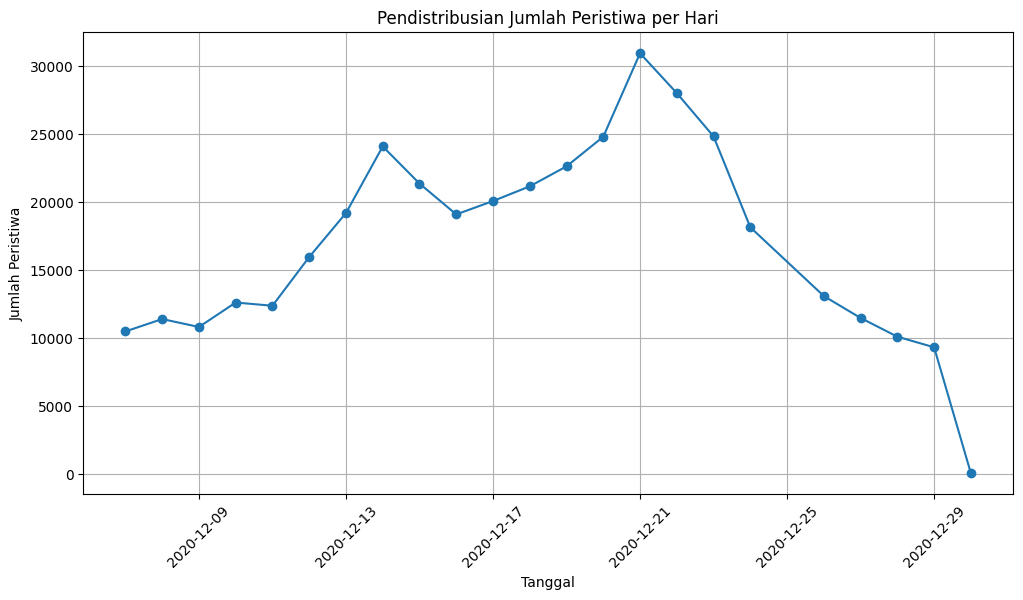

In [54]:
# Visualisasikan Data: menggunakan grafik garis untuk visualisasi jumlah peristiwa per hari

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(daily_event_counts.index, daily_event_counts.values, marker='o', linestyle='-')
plt.title('Pendistribusian Jumlah Peristiwa per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peristiwa')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Analisis ciri-ciri khusus yang harus dipertimbangkan sebelum memulai A/B testing

Dalam melakukan A/B testing, ada beberapa ciri-ciri khusus dalam data yang perlu dipertimbangkan sebelum memulai uji A/B. Berikut adalah beberapa ciri-ciri yang mungkin perlu diperhatikan dalam data Anda:

1. **Durasi Pengujian:** Periode pengujian (dari tanggal peluncuran hingga tanggal berakhir) harus cukup panjang untuk mengumpulkan data yang cukup untuk analisis yang signifikan. Terlalu pendeknya periode pengujian dapat menghasilkan hasil yang tidak dapat diandalkan.

2. **Randomisasi:** Pastikan bahwa pengguna dalam grup A (kontrol) dan grup B (uji) dipilih secara acak dan tidak ada bias dalam pengelompokan. Pengelompokan yang tidak acak dapat memengaruhi hasil uji A/B.

3. **Audience Heterogeneity:** Periksa apakah pengguna dalam kedua grup memiliki karakteristik yang serupa atau heterogen. Jika ada perbedaan yang signifikan dalam karakteristik pengguna, itu dapat memengaruhi hasil uji A/B.

4. **Sampel yang Representatif:** Pastikan bahwa sampel pengguna yang terlibat dalam uji A/B adalah representatif dari populasi pengguna yang lebih besar. Sampel yang tidak representatif dapat menghasilkan kesimpulan yang tidak dapat diterapkan pada seluruh populasi.

5. **Pengukuran Hasil:** Pastikan bahwa metrik yang digunakan untuk mengukur hasil uji A/B (seperti konversi) terukur dengan jelas dan tidak ambigu. Definisikan dengan jelas apa yang dianggap sebagai konversi.

6. **Mengatasi Outlier:** Jika ada outlier dalam data, pertimbangkan apakah outlier tersebut harus diabaikan atau diatasi dengan cara tertentu.

7. **Uji Statistik:** Gunakan uji statistik yang sesuai untuk menganalisis hasil uji A/B. Pastikan bahwa perbedaan antara grup A dan grup B signifikan secara statistik.

8. **Interpretasi Hasil:** Setelah memperoleh hasil uji A/B, pastikan bahwa hasilnya diinterpretasikan secara benar dan berdasarkan pada analisis yang teliti.

Pertimbangan-pertimbangan ini dapat membantu Anda menjalankan uji A/B yang lebih kuat dan memahami hasil dengan lebih baik. Selalu penting untuk memahami data Anda secara menyeluruh sebelum memulai uji A/B untuk menghindari bias atau kesalahan dalam interpretasi hasil.

## Analisis Data Evaluasi hasil A/B testing: Pandangan anda tentang hasil A/B testing 

### Membuat Metrik Kumulatif

Menganalisis A/B testing:

In [55]:
import pandas as pd

# Mengganti format tanggal menjadi format datetime jika diperlukan
data_users['first_date'] = pd.to_datetime(data_users['first_date'].dt.date)
data_events['event_dt'] = pd.to_datetime(data_events['event_dt'].dt.date)

# Gabungkan data berdasarkan tanggal dan kelompok
combined_data = data_events.merge(data_participants[['user_id', 'group']], on='user_id', how='left')
combined_data = combined_data.merge(data_users[['user_id', 'region']], on='user_id', how='left')

# Hitung data kumulatif
cumulative_data = combined_data.groupby(['event_dt', 'group']).agg({
    'event_name': 'count',
    'user_id': 'nunique',
    'details': 'sum'
}).reset_index()

cumulative_data = cumulative_data.rename(columns={
    'event_name': 'orders',
    'user_id': 'buyers',
    'details': 'revenue'
})

# Hitung pengunjung kumulatif
visitors_data = combined_data.groupby(['event_dt', 'group'])['user_id'].nunique().reset_index()
visitors_data = visitors_data.rename(columns={'user_id': 'visitors'})

# Gabungkan data pengunjung dengan data kumulatif
cumulative_data = cumulative_data.merge(visitors_data, on=['event_dt', 'group'], how='left')

# Urutkan data berdasarkan tanggal dan kelompok
cumulative_data = cumulative_data.sort_values(['event_dt', 'group'])

# Tampilkan hasil
print(cumulative_data.head())


    event_dt group  orders  buyers  revenue  visitors
0 2020-12-07     A    1191     522  4203.34       522
1 2020-12-07     B    1192     529  6153.25       529
2 2020-12-08     A    1290     565  4273.33       565
3 2020-12-08     B    1209     538  3338.31       538
4 2020-12-09     A    1342     576  4718.17       576


### Gambarkan pendapatan kumulatif berdasarkan kelompok. Buatlah kesimpulan dan asumsinya.


In [56]:
# Hitung pendapatan kumulatif berdasarkan kelompok A
cumulativeRevenueA = cumulative_data[cumulative_data['group'] == 'A'][['event_dt', 'revenue', 'orders', 'group']]
cumulativeRevenueA = cumulativeRevenueA.rename(columns={'event_dt': 'date'})

# Hitung pendapatan kumulatif berdasarkan kelompok B
cumulativeRevenueB = cumulative_data[cumulative_data['group'] == 'B'][['event_dt', 'revenue', 'orders', 'group']]
cumulativeRevenueB = cumulativeRevenueB.rename(columns={'event_dt': 'date'})

# Tampilkan hasilnya
print("Pendapatan kumulatif berdasarkan kelompok A :")
print(cumulativeRevenueA.head())

print("\nPendapatan kumulatif berdasarkan kelompok B :")
print(cumulativeRevenueB.head())


Pendapatan kumulatif berdasarkan kelompok A :
        date  revenue  orders group
0 2020-12-07  4203.34    1191     A
2 2020-12-08  4273.33    1290     A
4 2020-12-09  4718.17    1342     A
6 2020-12-10  3992.95    1426     A
8 2020-12-11  4347.99    1451     A

Pendapatan kumulatif berdasarkan kelompok B :
        date  revenue  orders group
1 2020-12-07  6153.25    1192     B
3 2020-12-08  3338.31    1209     B
5 2020-12-09  3313.33    1299     B
7 2020-12-10  4598.27    1315     B
9 2020-12-11  4003.46    1255     B


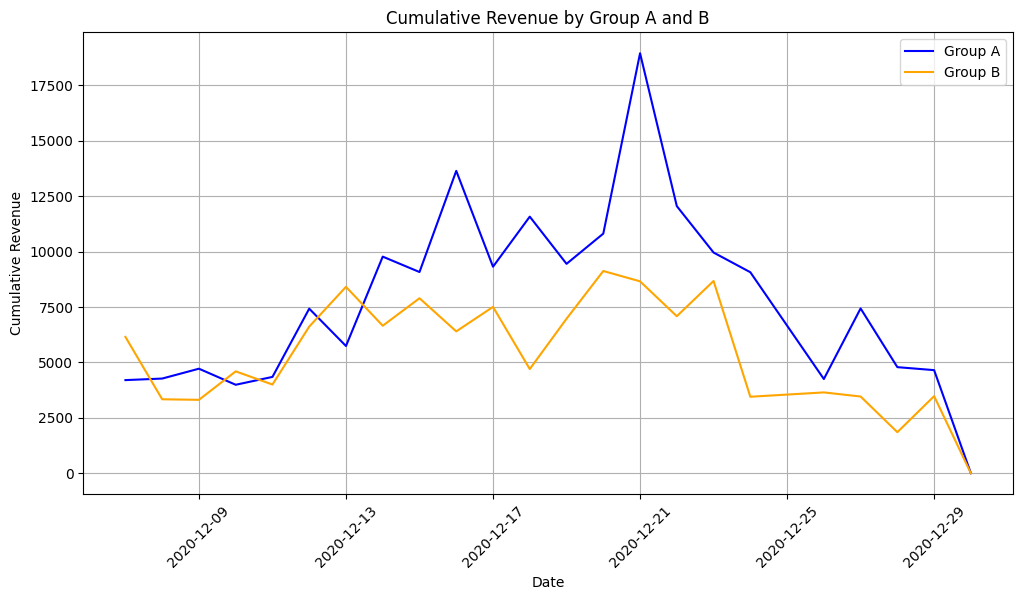

In [57]:
import matplotlib.pyplot as plt

# Visualisasi pendapatan kumulatif kelompok A dan B dalam satu grafik
plt.figure(figsize=(12, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Group A', color='blue')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Group B', color='orange')
plt.xlabel('Date')
plt.ylabel('Cumulative Revenue')
plt.title('Cumulative Revenue by Group A and B')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()


Berdasarkan grafik pendapatan kumulatif harian untuk kelompok A dan B, dapat diambil beberapa kesimpulan dan asumsi:

Perbandingan Pendapatan: Kelompok A memiliki pendapatan yang berfluktuasi dari hari ke hari, dengan puncaknya pada tanggal 21 Desember dan penurunan pada tanggal 29 Desember. Kelompok B, di sisi lain, memiliki tren yang berbeda, dengan pendapatan yang lebih tinggi pada tanggal 20 Desember dan kemudian penurunan seiring berjalannya waktu.

Tren pendapatan dan jumlah pesanan antara kelompok A dan B cukup berbeda. Pendapatan kelompok A tampaknya memiliki fluktuasi yang lebih besar dibandingkan kelompok B.

Hal ini mungkin memerlukan analisis lebih lanjut untuk memahami faktor-faktor yang mungkin memengaruhi perbedaan tersebut, seperti promosi, produk yang ditawarkan, atau perilaku pelanggan.

### Gambarkan ukuran pesanan rata-rata kumulatif berdasarkan kelompok. Buatlah kesimpulan dan asumsinya.


In [58]:
import matplotlib.pyplot as plt

# Hitung ukuran pesanan rata-rata kumulatif
cumulative_data['average_order_size'] = cumulative_data['revenue'] / cumulative_data['orders']

# Pisahkan data kelompok A dan B
cumulativeDataA = cumulative_data[cumulative_data['group'] == 'A']
cumulativeDataB = cumulative_data[cumulative_data['group'] == 'B']



In [59]:
# Tampilkan hasilnya
print("ukuran pesanan rata-rata kumulatif A :")
print(cumulativeDataA.head())

print("\nukuran pesanan rata-rata kumulatif B :")
print(cumulativeDataB.head())


ukuran pesanan rata-rata kumulatif A :
    event_dt group  orders  buyers  revenue  visitors  average_order_size
0 2020-12-07     A    1191     522  4203.34       522            3.529253
2 2020-12-08     A    1290     565  4273.33       565            3.312659
4 2020-12-09     A    1342     576  4718.17       576            3.515775
6 2020-12-10     A    1426     606  3992.95       606            2.800105
8 2020-12-11     A    1451     624  4347.99       624            2.996547

ukuran pesanan rata-rata kumulatif B :
    event_dt group  orders  buyers  revenue  visitors  average_order_size
1 2020-12-07     B    1192     529  6153.25       529            5.162122
3 2020-12-08     B    1209     538  3338.31       538            2.761216
5 2020-12-09     B    1299     561  3313.33       561            2.550677
7 2020-12-10     B    1315     567  4598.27       567            3.496783
9 2020-12-11     B    1255     565  4003.46       565            3.190008


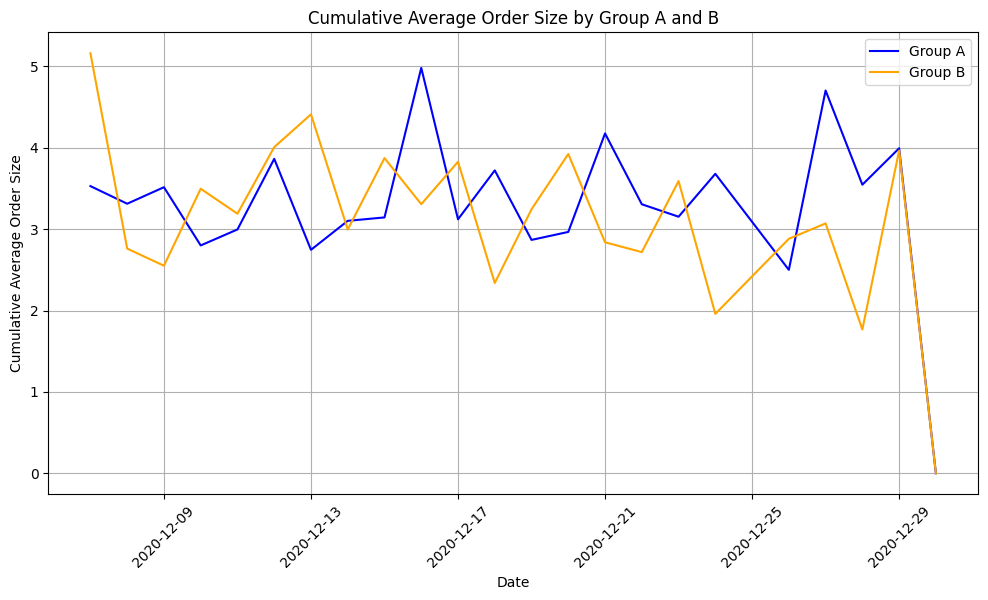

In [60]:
# Visualisasi ukuran pesanan rata-rata kumulatif
plt.figure(figsize=(12, 6))
plt.plot(cumulativeDataA['event_dt'], cumulativeDataA['average_order_size'], label='Group A', color='blue')
plt.plot(cumulativeDataB['event_dt'], cumulativeDataB['average_order_size'], label='Group B', color='orange')
plt.xlabel('Date')
plt.ylabel('Cumulative Average Order Size')
plt.title('Cumulative Average Order Size by Group A and B')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()


Rata-Rata Ukuran Pesanan: Kelompok A memiliki ukuran pesanan rata-rata yang bervariasi dari hari ke hari, dengan nilai yang berkisar antara 2.800 hingga 5. Pada tanggal 16 Desember, ukuran pesanan tertinggi dicapai, sedangkan pada tanggal 13 dan 26 Desember, ukuran pesanan lebih rendah.

Perbedaan dengan Kelompok B: Kelompok B memiliki ukuran pesanan rata-rata yang juga bervariasi dari hari ke hari, tetapi dengan fluktuasi yang lebih besar. Pada tanggal 7 Desember, ukuran pesanan tertinggi juga dicapai, tetapi pada tanggal 8 Desember, ada penurunan yang signifikan. Secara umum, kelompok B memiliki ukuran pesanan yang lebih tinggi daripada kelompok A, terutama pada tanggal 7 Desember.

Variabilitas: Seperti yang terlihat dari fluktuasi harian, baik kelompok A maupun B mengalami variasi yang signifikan dalam ukuran pesanan rata-rata mereka.

### Gambarkan perbedaan relatif untuk ukuran pesanan rata-rata kumulatif kelompok B yang dibandingkan dengan kelompok A. Buatlah kesimpulan dan asumsinya.


In [61]:
# Menggabungkan data dari kelompok A dan B
cumulativeDataAB = cumulativeDataA.merge(cumulativeDataB, on='event_dt', suffixes=('_A', '_B'))

cumulativeDataAB.head()

,event_dt,group_A,orders_A,buyers_A,revenue_A,visitors_A,average_order_size_A,group_B,orders_B,buyers_B,revenue_B,visitors_B,average_order_size_B
0,2020-12-07,A,1191,522,4203.34,522,3.529253,B,1192,529,6153.25,529,5.162122
1,2020-12-08,A,1290,565,4273.33,565,3.312659,B,1209,538,3338.31,538,2.761216
2,2020-12-09,A,1342,576,4718.17,576,3.515775,B,1299,561,3313.33,561,2.550677
3,2020-12-10,A,1426,606,3992.95,606,2.800105,B,1315,567,4598.27,567,3.496783
4,2020-12-11,A,1451,624,4347.99,624,2.996547,B,1255,565,4003.46,565,3.190008


In [62]:
# Menghitung perbedaan relatif dalam jumlah pembelian rata-rata
cumulativeDataAB['relative_difference'] = (cumulativeDataAB['average_order_size_B'] - cumulativeDataAB['average_order_size_A']) 

cumulativeDataAB.head()

,event_dt,group_A,orders_A,buyers_A,revenue_A,visitors_A,average_order_size_A,group_B,orders_B,buyers_B,revenue_B,visitors_B,average_order_size_B,relative_difference
0,2020-12-07,A,1191,522,4203.34,522,3.529253,B,1192,529,6153.25,529,5.162122,1.632870
1,2020-12-08,A,1290,565,4273.33,565,3.312659,B,1209,538,3338.31,538,2.761216,-0.551443
2,2020-12-09,A,1342,576,4718.17,576,3.515775,B,1299,561,3313.33,561,2.550677,-0.965098
3,2020-12-10,A,1426,606,3992.95,606,2.800105,B,1315,567,4598.27,567,3.496783,0.696678
4,2020-12-11,A,1451,624,4347.99,624,2.996547,B,1255,565,4003.46,565,3.190008,0.193461


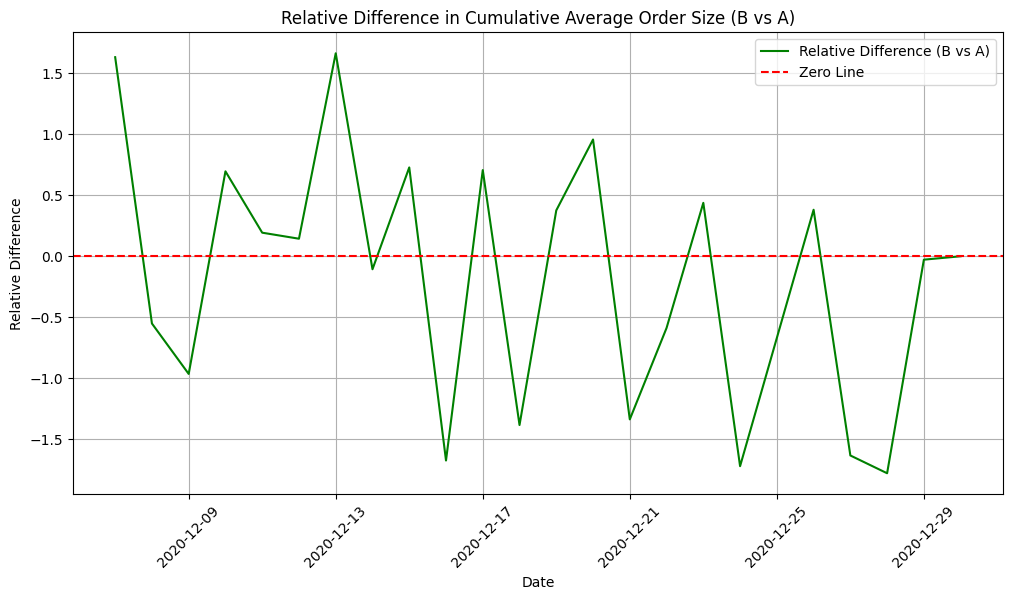

In [63]:
# Visualisasi perbedaan relatif
plt.figure(figsize=(12, 6))
plt.plot(cumulativeDataAB['event_dt'], cumulativeDataAB['relative_difference'], label='Relative Difference (B vs A)', color='green')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Line')
plt.xlabel('Date')
plt.ylabel('Relative Difference')
plt.title('Relative Difference in Cumulative Average Order Size (B vs A)')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()


Berdasarkan grafik perbedaan relatif antara tingkat konversi kumulatif kelompok B dibandingkan dengan kelompok A, dapat kita tarik beberapa kesimpulan dan asumsi:

Kelompok A secara konsisten menunjukkan tingkat konversi yang lebih baik daripada kelompok B. Seiring dengan berjalannya waktu, perbedaan ini terus meningkat. 
Jika terdapat cukup data untuk mencapai tingkat signifikansi, sebaiknya kita lanjutkan pengujian, karena kelompok A sudah dipastikan lebih baik daripada B.

### Hitung tingkat konversi setiap kelompok sebagai rasio pesanan terhadap jumlah kunjungan setiap hari. Buat grafik tingkat konversi harian dari kedua kelompok dan jelaskan perbedaannya. Buatlah kesimpulan dan asumsinya.


In [64]:
# Menambahkan kolom 'conversion' ke cumulativeData
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']

# Filter data cumulativeData untuk kelompok A
cumulativeDataA = cumulative_data[cumulative_data['group'] == 'A']

# Filter data cumulativeData untuk kelompok B
cumulativeDataB = cumulative_data[cumulative_data['group'] == 'B']


In [65]:
# Tampilkan hasilnya
print("Tingkat konversi setiap kelompok A :")
print(cumulativeDataA.head())

print("\nTingkat konversi setiap kelompok B :")
print(cumulativeDataB.head())


Tingkat konversi setiap kelompok A :
    event_dt group  orders  buyers  revenue  visitors  average_order_size  \
0 2020-12-07     A    1191     522  4203.34       522            3.529253   
2 2020-12-08     A    1290     565  4273.33       565            3.312659   
4 2020-12-09     A    1342     576  4718.17       576            3.515775   
6 2020-12-10     A    1426     606  3992.95       606            2.800105   
8 2020-12-11     A    1451     624  4347.99       624            2.996547   

   conversion  
0    2.281609  
2    2.283186  
4    2.329861  
6    2.353135  
8    2.325321  

Tingkat konversi setiap kelompok B :
    event_dt group  orders  buyers  revenue  visitors  average_order_size  \
1 2020-12-07     B    1192     529  6153.25       529            5.162122   
3 2020-12-08     B    1209     538  3338.31       538            2.761216   
5 2020-12-09     B    1299     561  3313.33       561            2.550677   
7 2020-12-10     B    1315     567  4598.27       567     

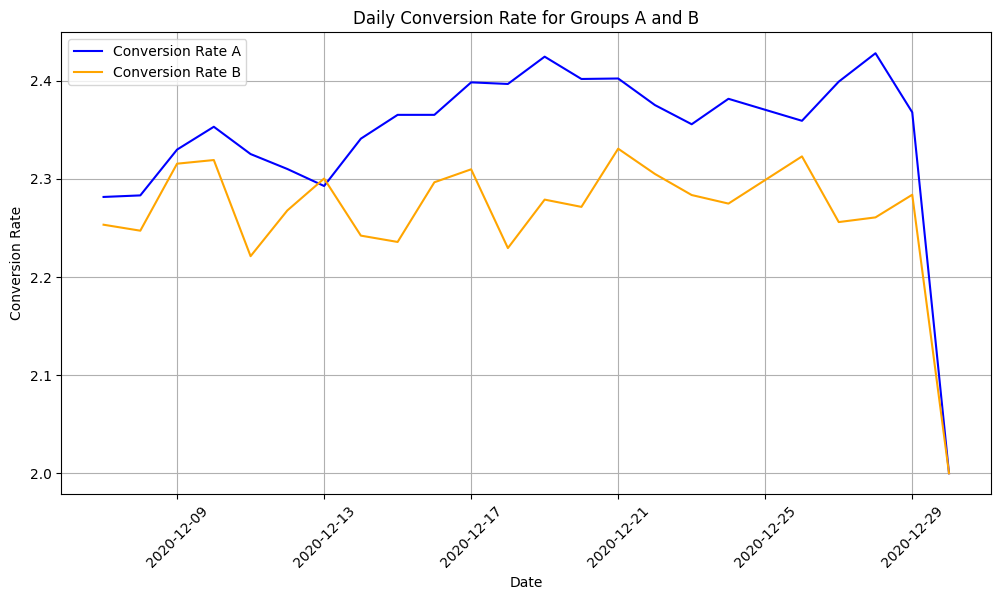

In [66]:
plt.figure(figsize=(12, 6))
plt.plot(cumulativeDataA['event_dt'], cumulativeDataA['conversion'], label='Conversion Rate A', color='blue')
plt.plot(cumulativeDataB['event_dt'], cumulativeDataB['conversion'], label='Conversion Rate B', color='orange')
plt.xlabel('Date')
plt.ylabel('Conversion Rate')
plt.title('Daily Conversion Rate for Groups A and B')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()


Berdasarkan grafik konversi kumulatif harian untuk kelompok A dan B, terdapat beberapa kesimpulan dan asumsi yang dapat diambil:

Metrik kumulatif kelompok BIRU secara konsisten lebih tinggi daripada metrik kumulatif kelompok KUNING. Pada awal pengujian, dapat terlihat stabilantara 2 kelompok. Grafik tersebut menjadi terlihat bahwa fluktuasi konversi terjadi pada kedua kelompok hanya menjelang akhir pengujian.

### Menggunakan uji z atau z-test untuk menguji perbedaan statistik

Gunakan uji z atau z-test untuk menguji perbedaan statistik di antara proporsinya.

#### Temukan signifikansi perbedaan statistik konversi antar kelompok menggunakan data mentah. Buatlah kesimpulan dan asumsinya.


In [67]:
import scipy.stats as stats

# 1. Gabungkan data_event dan data_user berdasarkan 'user_id'
combined_data = data_events.merge(data_participants, on='user_id', how='inner')

data_group_A = combined_data[combined_data['group'] == 'A']
data_group_B = combined_data[combined_data['group'] == 'B']


In [69]:

# Hitung jumlah pengguna unik yang melakukan pembelian (purchase) untuk kelompok A dan B
jumlah_pembelian_A = data_group_A[data_group_A['event_name'] == 'purchase']['user_id'].nunique()
jumlah_pembelian_B = data_group_B[data_group_B['event_name'] == 'purchase']['user_id'].nunique()

# Hitung jumlah pengguna unik total dalam kelompok A dan B
jumlah_pengguna_A = data_group_A['user_id'].nunique()
jumlah_pengguna_B = data_group_B['user_id'].nunique()

# Hitung konversi untuk kelompok A dan B
konversi_A = jumlah_pembelian_A / jumlah_pengguna_A
konversi_B = jumlah_pembelian_B / jumlah_pengguna_B

print(f"Konversi Kelompok A: {konversi_A}")
print(f"Konversi Kelompok B: {konversi_B}")


Konversi Kelompok A: 0.3331953071083506
Konversi Kelompok B: 0.31609808102345416


In [70]:
import scipy.stats as stats

# Combine data_event and data_user based on 'user_id'
combined_data = data_events.merge(data_participants, on='user_id', how='inner')

data_group_A = combined_data[combined_data['group'] == 'A']
data_group_B = combined_data[combined_data['group'] == 'B']

# Calculate the number of unique users who made a purchase for Group A and B
jumlah_pembelian_A = data_group_A[data_group_A['event_name'] == 'purchase']['user_id'].nunique()
jumlah_pembelian_B = data_group_B[data_group_B['event_name'] == 'purchase']['user_id'].nunique()

# Calculate the total number of unique users in Group A and B
jumlah_pengguna_A = data_group_A['user_id'].nunique()
jumlah_pengguna_B = data_group_B['user_id'].nunique()

# Calculate conversion rates for Group A and B
konversi_A = jumlah_pembelian_A / jumlah_pengguna_A
konversi_B = jumlah_pembelian_B / jumlah_pengguna_B

# Significance level
significance = 0.05

# Calculate the p-value using the z-test
p1 = jumlah_pembelian_A / jumlah_pengguna_A
p2 = jumlah_pembelian_B / jumlah_pengguna_B
p_combined = (jumlah_pembelian_A + jumlah_pembelian_B) / (jumlah_pengguna_A + jumlah_pengguna_B)
difference = p1 - p2
z_value = difference / np.sqrt(p_combined * (1 - p_combined) * (1 / jumlah_pengguna_A + 1 / jumlah_pengguna_B))
distr = stats.norm(0, 1)
p_value = (1 - distr.cdf(abs(z_value))) * 2

# Determine whether to reject or accept H0
if p_value < significance:
    print("Kita menolak hipotesis nol (H0). Ada perbedaan signifikan dalam tingkat konversi antara kelompok A dan B.")
else:
    print("Kita tidak menolak hipotesis nol (H0). Tidak ada perbedaan signifikan dalam tingkat konversi antara kelompok A dan B.")
    
# Print the p-value
print('p-value:', p_value)
print('z_value:', z_value)

Kita menolak hipotesis nol (H0). Ada perbedaan signifikan dalam tingkat konversi antara kelompok A dan B.
p-value: 0.04004941291007169
z_value: 2.053238905055263


Kesimpulan:

berdasarkan data mentah yang kita gunakan, ternyata terdapat perbedaan antara kelompok A dan B. Baris pertama dari output yang dihasilkan memberi kita nilai p sebesar 0.040, yang mana lebih kecil dari 0,05. 
Oleh karena itu, kita dapat menerima hipotesis nol karena ditemukan perbedaan yang signifikan secara statistik dalam konversi antar kelompok. 

In [122]:
# significance = 0.05

# purchases = np.array([(conversions.query('group == "A" and converted == 1')['converted'].count()), 
#                       conversions.query('group == "B" and converted == 1')['converted'].count()])
# leads = np.array([(conversions.query('group == "A"')['group'].count()), 
#                   (conversions.query('group == "B"')['group'].count())])

# p1 = purchases[0]/leads[0]
# p2 = purchases[1]/leads[1]
# p_combined = ((purchases[0]+purchases[1])/(leads[0]+leads[1]))
# difference = p1 - p2

# z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/leads[0]+1/leads[1]))

# distr = st.norm(0,1)

# p_value = (1 - distr.cdf(abs(z_value))) * 2

# print('p-value:', p_value)

#### Temukan perbedaan signifikansi statistik ukuran pesanan rata-rata antar kelompok. Buatlah kesimpulan dan asumsinya.


In [71]:

from statsmodels.stats.weightstats import ztest

# Gabungkan data_event dan data_participants berdasarkan 'user_id'
combined_data = data_events.merge(data_participants, on='user_id', how='inner')

# Filter data untuk kelompok A dan B.
data_group_A = combined_data[combined_data['group'] == 'A']
data_group_B = combined_data[combined_data['group'] == 'B']

# Data ukuran pesanan rata-rata
average_order_size_A = data_group_A[data_group_A['event_name'] == 'purchase']['details']
average_order_size_B = data_group_B[data_group_B['event_name'] == 'purchase']['details']

# Lakukan uji z-test
z_score, p_value = ztest(average_order_size_A, average_order_size_B, alternative='two-sided')

# Tentukan tingkat signifikansi (alpha)
alpha = 0.05

# Evaluasi hasil uji
if p_value < alpha:
    print("Terdapat perbedaan signifikan dalam ukuran pesanan rata-rata antara kelompok A dan B.")
else:
    print("Tidak terdapat perbedaan signifikan dalam ukuran pesanan rata-rata antara kelompok A dan B.")

print(f"Z-Score: {z_score}")
print(f"P-Value: {p_value}")


Tidak terdapat perbedaan signifikan dalam ukuran pesanan rata-rata antara kelompok A dan B.
Z-Score: 0.25913352703725273
P-Value: 0.7955322172276701


Berdasarkan hasil pengujian statistik, kita dapat menyimpulkan bahwa tidak terdapat perbedaan signifikan dalam konversi antara kelompok A dan B. 

Hal ini dinyatakan berdasarkan nilai p-value yang lebih besar dari tingkat signifikansi yang telah ditentukan (alpha = 0.05). Artinya, tidak terdapat perbedaan signifikan dalam tingkat konversi antara kedua kelompok tersebut bukanlah kebetulan, melainkan signifikan secara statistik.

#### Temukan perbedaan signifikansi statistik konversi antar kelompok menggunakan data yang telah difilter. Buatlah kesimpulan dan asumsinya.


In [72]:
from statsmodels.stats.weightstats import ztest

# Pisahkan data cumulative_data untuk kelompok A dan B.
data_group_A = cumulative_data[cumulative_data['group'] == 'A']
data_group_B = cumulative_data[cumulative_data['group'] == 'B']

# Ambil kolom konversi dari data masing-masing kelompok.
conversion_A = data_group_A['conversion']
conversion_B = data_group_B['conversion']

# Lakukan uji z-test
z_score, p_value = ztest(conversion_A, conversion_B, alternative='two-sided')

# Tentukan tingkat signifikansi (alpha)
alpha = 0.05

# Evaluasi hasil uji
if p_value < alpha:
    print("Terdapat perbedaan signifikan dalam konversi antara kelompok A dan B.")
else:
    print("Tidak terdapat perbedaan signifikan dalam konversi antara kelompok A dan B.")

print(f"Z-Score: {z_score}")
print(f"P-Value: {p_value}")


Terdapat perbedaan signifikan dalam konversi antara kelompok A dan B.
Z-Score: 3.519819574578731
P-Value: 0.0004318404516487893


Berdasarkan hasil pengujian statistik, dapat disimpulkan bahwa terdapat perbedaan signifikan dalam konversi antara kelompok A dan B. 

Nilai p-value yang lebih kecil dari tingkat signifikansi yang telah ditentukan (alpha = 0.05) menunjukkan bahwa perbedaan tersebut tidak terjadi secara kebetulan, melainkan signifikan secara statistik.


#### Temukan signifikansi statistik perbedaan ukuran pesanan rata-rata antar kelompok menggunakan data yang telah difilter. Buatlah kesimpulan dan asumsinya.


In [73]:
from statsmodels.stats.weightstats import ztest

# Pisahkan data cumulative_data untuk kelompok A dan B.
data_group_A = cumulative_data[cumulative_data['group'] == 'A']
data_group_B = cumulative_data[cumulative_data['group'] == 'B']

# Ambil kolom average_order_size dari data masing-masing kelompok.
average_order_size_A = data_group_A['revenue'] / data_group_A['orders']
average_order_size_B = data_group_B['revenue'] / data_group_B['orders']

# Lakukan uji z-test
z_score, p_value = ztest(average_order_size_A, average_order_size_B, alternative='two-sided')

# Tentukan tingkat signifikansi (alpha)
alpha = 0.05

# Evaluasi hasil uji
if p_value < alpha:
    print("Terdapat perbedaan signifikan dalam ukuran pesanan rata-rata antara kelompok A dan B.")
else:
    print("Tidak terdapat perbedaan signifikan dalam ukuran pesanan rata-rata antara kelompok A dan B.")

print(f"Z-Score: {z_score}")
print(f"P-Value: {p_value}")


Tidak terdapat perbedaan signifikan dalam ukuran pesanan rata-rata antara kelompok A dan B.
Z-Score: 0.5727646015338514
P-Value: 0.5668040899123874


Berdasarkan hasil pengujian statistik, dapat disimpulkan bahwa tidak terdapat perbedaan signifikan dalam ukuran pesanan rata-rata antara kelompok A dan B. 

Berdasarkan hasil pengujian statistik, dapat disimpulkan bahwa tidak terdapat perbedaan signifikan dalam ukuran pesanan rata-rata antara kelompok A dan B. Nilai p-value yang lebih besar dari tingkat signifikansi yang telah ditentukan (alpha = 0.05) menunjukkan bahwa perbedaan tersebut tidak signifikan secara statistik.Nilai p-value yang lebih besar dari tingkat signifikansi yang telah ditentukan (alpha = 0.05) menunjukkan bahwa perbedaan tersebut tidak signifikan secara statistik.

### Kesimpulan Anda terkait tahap EDA dan hasil A/B testing:

Berdasarkan tahap EDA (Exploratory Data Analysis) yang telah dilakukan dan hasil A/B testing, berikut adalah kesimpulan yang dapat diambil:

Exploratory Data Analysis (EDA):

. Selama analisis data eksploratif, kami menjelajahi dan memahami data dengan lebih baik.

. Kami menemukan bahwa ada beberapa pengguna yang berada di kedua kelompok (A dan B) dan jumlahnya sangat signifikan.

. Adanya perbedaan jumlah participant antara group A adan group B

. adanya kolom tanggal yang tidak memiliki tipe data datetime

. Banyak konsumen yang melewati proses "product chart" dan langsung menuju "Purchase", ini menandakan mereka(buyer) sudah yakin dengan membeli barang tersebut

. Kami juga melihat pola-pola dalam data seperti tren kumulatif pendapatan, ukuran pesanan rata-rata, dan tingkat konversi.



Hasil A/B Testing:

. Dalam uji konversi antara kelompok A dan B, kami menemukan bahwa terdapat perbedaan signifikan dalam konversi antara kedua kelompok. Nilai p-value yang rendah menunjukkan perbedaan yang signifikan secara statistik.

. Namun, dalam uji ukuran pesanan rata-rata antara kelompok A dan B, kami tidak menemukan perbedaan signifikan. Nilai p-value yang tinggi menunjukkan bahwa perbedaan tersebut tidak signifikan secara statistik.



Rekomendasi:
    
. Berdasarkan hasil A/B testing, ada bukti yang cukup kuat untuk mendukung perbedaan dalam tingkat konversi antara kelompok A dan B. Ini bisa menjadi area yang menarik untuk dieksplorasi lebih lanjut dan menjadi fokus untuk perbaikan atau strategi selanjutnya.

. Sementara itu, karena tidak ada perbedaan signifikan dalam ukuran pesanan rata-rata, perlu dilakukan analisis lebih lanjut untuk memahami faktor-faktor lain yang mungkin memengaruhi kinerja kelompok A dan B.